## Luther Kaggle Data

I am working on this data concurrently with troubleshooting my webscraping code.  I will either use this data to enrich the data I pulled or as a substitute whilst still waiting for the code to finsh running.

The first section below will be involving only the main ted data.

In [119]:
import pandas as pd
import numpy as np
import re
import time
from datetime import *

In [120]:
data = pd.read_csv('ted_main.csv')
transcripts = pd.read_csv('transcripts.csv')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [122]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [123]:
def CleanCols(df):
    df.drop('url', axis=1, inplace = True)
    df.drop('description', axis=1, inplace = True)
    df.drop('name', axis=1, inplace = True)
    return df

In [124]:
#Converting unix to datetime
count=0
for i,y in zip(data.film_date,data.published_date):
    if type(i) is not datetime:
        new_date = datetime.fromtimestamp(i).date()
        data.at[count,'film_date'] = new_date
        new_date2 = datetime.fromtimestamp(y).date()
        data.at[count,'published_date'] = new_date2
        count+=1

In [125]:
#Removing unnecessary columns
CleanCols(data)

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views
0,4553,1164,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,977,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,1286,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,1116,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,1190,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869
5,672,1305,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401
6,919,992,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987
7,46,1198,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741
8,852,1485,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958
9,900,1262,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993


In [126]:
data['duration'] = round(data['duration']/60,2)
data

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views
0,4553,19.40,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,16.28,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,21.43,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,18.60,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,19.83,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869
5,672,21.75,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401
6,919,16.53,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987
7,46,19.97,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741
8,852,24.75,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958
9,900,21.03,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993


## Preliminary Plots 

Makign some preliminary plots to get a better idea of what the data shows and to help decide what factors will be incorporated in the linear regression.


In [108]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [129]:
"""dates = plt.dates.date2num(data.published_Date.to_list())
fig, ax = plt.subplots(figsize=(15,12))
fig = sns.lmplot(y="views", x=dates, data=data, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Time', 'Total Entries')"""

'dates = plt.dates.date2num(data.published_Date.to_list())\nfig, ax = plt.subplots(figsize=(15,12))\nfig = sns.lmplot(y="views", x=dates, data=data, hue = \'num_speaker\', fit_reg = False)\nfig = fig.set_axis_labels(\'Time\', \'Total Entries\')'

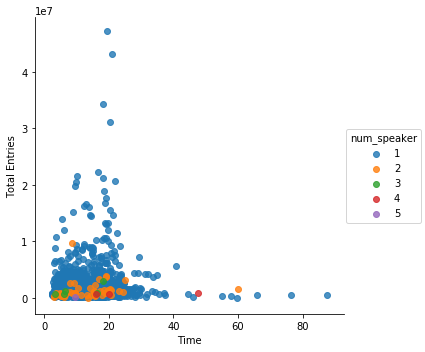

In [88]:
fig = sns.lmplot(y="views", x="duration", data=data, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views')

In [110]:
four_highest = data[data.views>30000000].ratings.index
four_highest

Int64Index([0, 677, 837, 1346], dtype='int64')

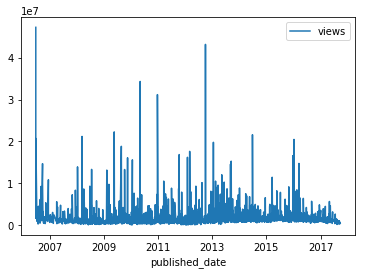

In [127]:
data[['published_date','views']].set_index('published_date').plot()

## Pulling out reactions

Each video has its own ratings, or reactions the watchers have during or after the video.

In [203]:
#Pulls the number of tags for a certain tag
def FindTag(tag, sl):
    hand = False
    count = 0
    for i in sl:
        if tag in i:
            hand = True
        elif hand == True:
            count = int(i.split('}')[0].strip())
            hand= False
    return count

In [204]:
# calling in each tag individually to run through the broken comment.  I am doing this so its easier to 
# join the dataframes later (and match the number to the correct column)
def CrackShell(string):
    tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
    comment = string.split(':')
    emotes = []
    #I am searching by tag name because it will be easier to store and import to df later
    for i in tag_list:
        emotes.append(FindTag(i, comment))
    return emotes

In [205]:
emote_dict = {}
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
for i in range(len(data.ratings)):
        emote_dict[i] = CrackShell(data.ratings[i])

In [253]:
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']

In [254]:
from pandas import DataFrame
emote_df = pd.DataFrame.from_dict(emote_dict, orient = 'index')

In [261]:
emote_df.columns = tag_list
emote_df
data= data.join(emote_df)
df= data.drop('ratings', axis=1)

In [262]:
df

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,related_talks,speaker_occupation,...,Funny,Ingenious,Unconvincing,Longwinded,Informative,Inspiring,Fascinating,Persuasive,Jaw-dropping,Obnoxious
0,4553,19.40,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,...,19645,6073,300,387,7346,24924,10581,10704,4439,209
1,265,16.28,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,...,544,56,258,113,443,413,132,268,116,131
2,124,21.43,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,...,964,183,104,78,395,230,166,230,54,142
3,200,18.60,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,...,59,105,36,53,380,1070,132,460,230,35
4,593,19.83,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,...,1390,3202,67,110,5433,2893,4606,2542,3736,61
5,672,21.75,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,...,1102,397,377,285,1038,5211,1350,2423,669,335
6,919,16.53,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright",...,2484,320,225,193,226,438,316,311,61,290
7,46,19.97,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,...,9,195,26,26,121,175,153,37,57,5
8,852,24.75,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist",...,60,211,283,177,623,441,313,764,60,83
9,900,21.03,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author",...,26,116,838,306,304,2556,459,1543,209,371
